In [3]:
import torch
import numpy as np
from torchvision import datasets
import torchvision
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch.optim import SGD
import torch.nn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [5]:
data_folder = 'D:/'
fmnist = datasets.FashionMNIST(data_folder, download = True, train = True)
imgs = fmnist.data
targets = fmnist.targets

  3%|▎         | 688128/26421880 [00:11<06:55, 61995.60it/s]


KeyboardInterrupt: 

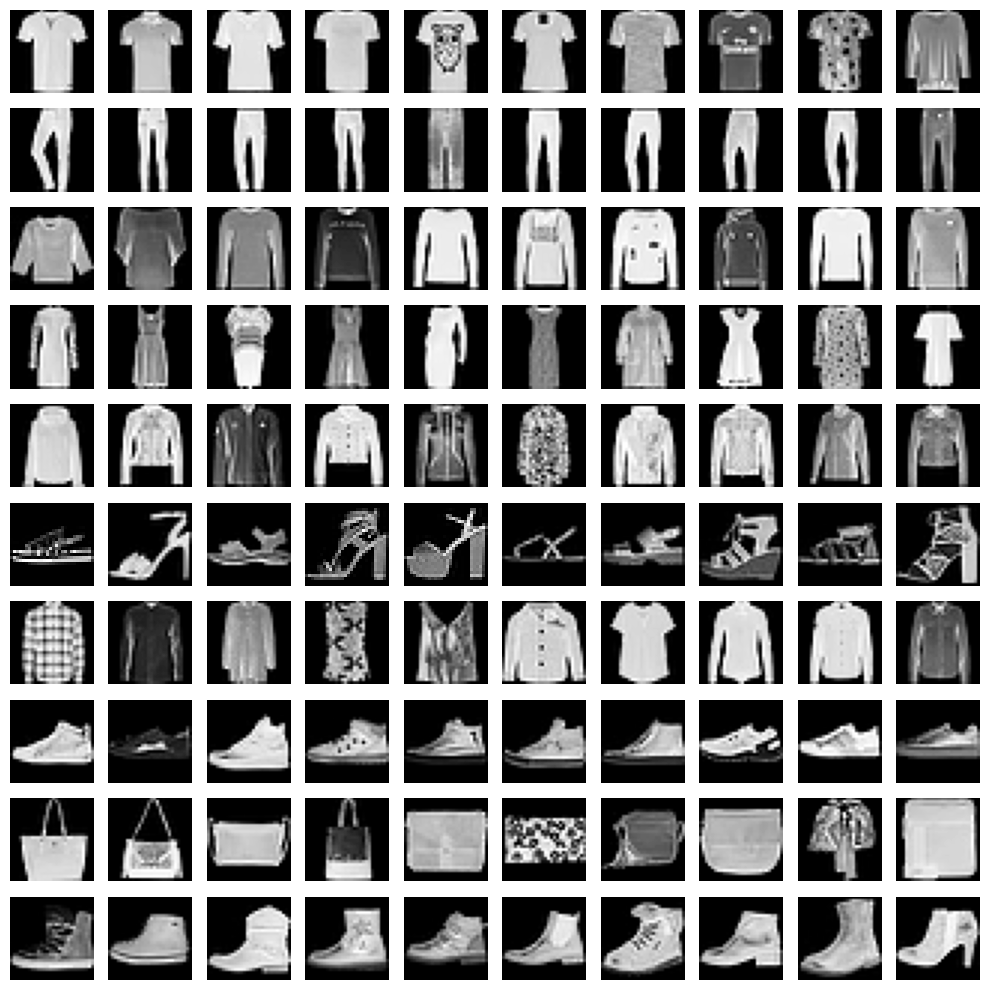

In [ ]:
r, c = len(targets.unique()), 10
_, ax = plt.subplots(nrows = r, ncols = c, figsize = (10, 10))
for label, row in enumerate(ax):
    label_row = np.where(targets == label)[0]
    for plot_cell in row:
        plot_cell.grid(False)
        plot_cell.axis('off')
        ix = np.random.choice(label_row)
        x, y = imgs[ix], targets[ix]
        plot_cell.imshow(x, cmap = 'gray')
plt.tight_layout()

In [ ]:
class FMNIST(Dataset):
    def __init__(self, x, y):
        x = x.float()
        x = x.view(-1, 28 * 28)
        self.x, self.y = x, y
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)
    def __len__(self):
        return len(self.x)

In [ ]:
def get_data():
    train = FMNIST(imgs, targets)
    train_dl = DataLoader(train, batch_size = 64, shuffle = True)
    return train_dl

In [ ]:
def get_model():
    model = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(28 * 28, 256),
        torch.nn.ReLU(),
        torch.nn.Linear(256, 10)
    ).to(device)
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr = 0.01)
    return model, loss_fn, optimizer

In [ ]:
def train_batch(x, y, model, loss_fn, optimizer):
    model.train()
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return loss.item()

In [ ]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    y_hat = model(x)
    max_val, arg_max = y_hat.max(-1)
    is_correct = arg_max == y
    return is_correct.cpu().numpy().tolist()

epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10


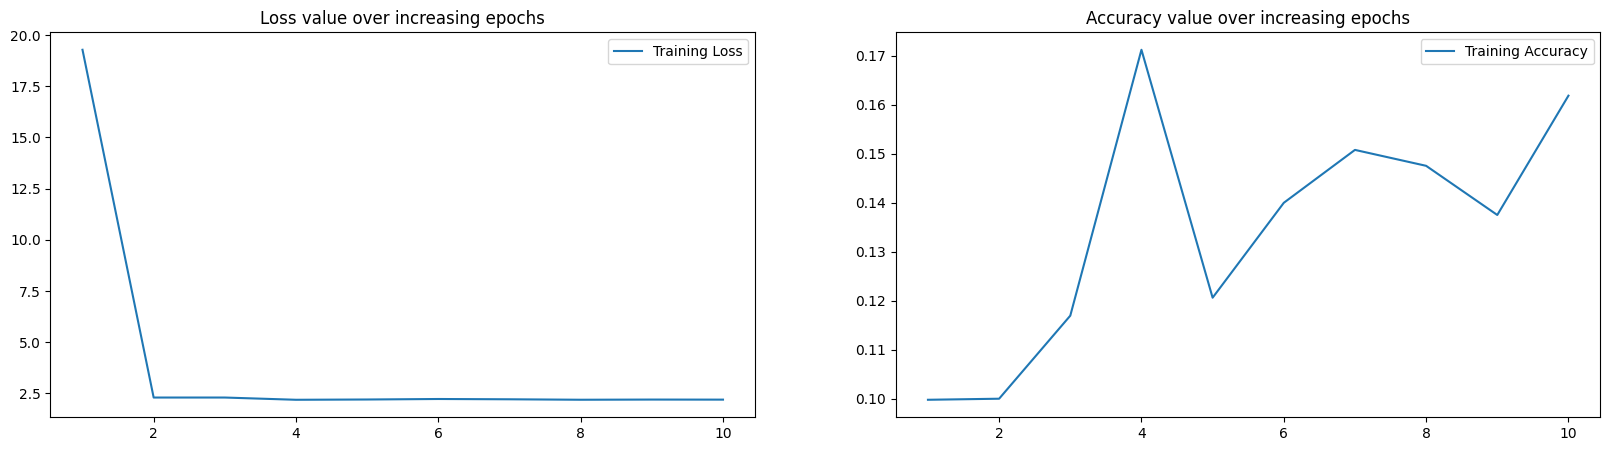

In [ ]:
epochs = np.arange(10) + 1
train_dl = get_data()
model, loss_fn, optimizer = get_model()
loss, acc = [], []
for epoch in range(len(epochs)):
    print(f'epoch: {epoch + 1}')
    epoch_loss, epoch_acc = [], []
    for ix, batch in enumerate(iter(train_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, loss_fn, optimizer)
        epoch_loss.append(batch_loss)
    epoch_loss_ = np.array(epoch_loss).mean()
    for ix, batch in enumerate(iter(train_dl)):
        x, y = batch
        batch_acc = accuracy(x, y, model)
        epoch_acc.extend(batch_acc)
    # print(epoch_acc)
    epoch_acc_ = np.mean(epoch_acc)
    loss.append(epoch_loss_)
    acc.append(epoch_acc_)


plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, acc, label='Training Accuracy')
# plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in
# plt.gca().get_yticks()])
plt.legend()


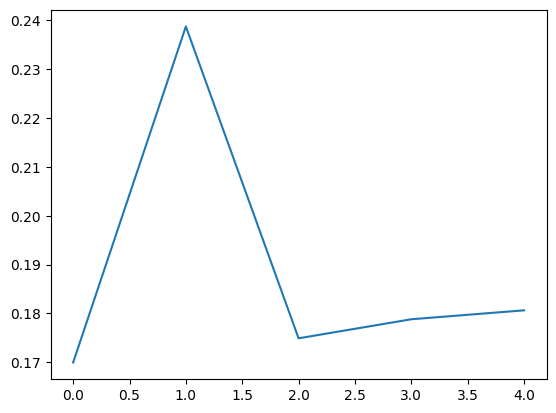